### COMSM0140: Internet Economics and Financial Technology 2023. Main coursework. 
### Radmehr Ghassabtabarshiadeh

Part A

A/B testing to determine whether SHVR or ZIC traders perform better using BSE market sessions simulation. SHVR or shaver trader, undercuts the best ask while ZIC uses only constraints to trade. The null hypothesis tested is that there is no signifacnt difference between the two traders and the alternative hypothesis of there being a signifacnt difference between the two traders, with the significance value (alpha) set to 0.05. A market session will run with the specification mentioned on the brief with start time and end time are set to 0 and 600 seconds respectively due to performance constrains. After the simulation are complete, two data frames are created, one with everything the "dump_avgbals" creates and another only taking in the accumilated average profit of each trader, this process is repeated for n number of sessions. To test the hypothesis, first normality of the data ismeasured and either a parametric or a non-parametric test is performed. Some helper functions are below to help do what was described. The functions "make_df" and "collect_avg_profit" are helper functions for "run_market_sim" which create a dataframe and grab the average profit for the two traders after each n session. The collected averages, are passed in to Shapiro-Wilk test to understand their distribution. t-test will be utilised as the parametric test and Mann-Whitney-U as the non-parametric test.

In [1]:
from helper import *
import numpy as np
import importlib
importlib.reload(helper)

supply_range = (310, 310)
demand_range = (250, 490)
start_time = 0
end_time = 600

In [2]:
n500mean_shvr, n500mean_zic = run_market_sim(trial_id="n500", no_sessions=500, R=50, n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time, path='n500_avg_balance.csv')
n50mean_shvr, n50mean_zic = run_market_sim(trial_id="n50", no_sessions=50, R=50, n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time, path='n50_avg_balance.csv')

In [3]:
plot_performance(n50mean_zic, n500mean_zic, n50mean_shvr, n500mean_shvr)

AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

The plots above showcase what was the average profit a trader made at the end of a session, zic traders being red and shvr traders being blue. It is observed that the profitablity is shared roughly equally between the two traders. So the expected results from the statistical test would be to conclude that we do not have sufficient evidence to reject the null hypothesis. That mean, there is no significant difference between the two traders when it comes to average profit in the market.

In [38]:
_, pvalue50_shvr = stats.shapiro(n500mean_shvr)
_, pvalue500_shvr = stats.shapiro(n50mean_shvr)
_, pvalue500_zic = stats.shapiro(n500mean_zic)
_, pvalue50_zic = stats.shapiro(n50mean_zic)
print(pvalue50_shvr, pvalue500_zic, pvalue50_zic, pvalue500_shvr)

0.9072362184524536 0.897792398929596 0.6380448341369629 0.6706226468086243


Shapiro-Wilk test is utilised to understand the distribution of each data, if they are following a normal distribution a parametric test is used, otherwise a non-parametric test is utilised. As the output demonstrates, all datasets are following a normal distribution therefore, no further normalisation is required and a t-test can be used. This is due to the p value of each sample being higher than the threshold of 0.05.

In [39]:
_, p_val50 = stats.ttest_ind(n50mean_zic, n50mean_shvr)
print(p_val50, 'p val for 50 sessions')
_, p_val500 = stats.ttest_ind(n500mean_zic, n500mean_shvr)
print(p_val500, 'p val for 500 sessions')

0.3009148797269981 p val for 50 sessions
0.709222043118231 p val for 500 sessions


In the simulated market sessions, the p value for both number of sessions n is above the threshold of 0.05, meaning we do not have sufficient evidence to reject the null hypothesis. In other words, we can conclude that there is no significant difference between the two trader's performance when comparing the average profit per session.

PART B

For this part, the ratio of the market agents are manipulated to the brief's specification. Code cell below, modifies the previously used code to accomedate these changes by collecting and returning the resaults in an two dimensional array. Within each resault, there are two data sets, the first being mean profit of shvr while the second being zic traders. For each pair of data, 9 in this case, they will be tested to see whether they are normaly distributed using Shapiro-Wilk and then appropriate hypothesis testing. Another thing to consider is the variance of the data, since there are different number of traders in the market, the variance difference will be high. Welch's t-test is a form of t-test when variance variable is set to false and is utilised here.

In [40]:
R = [10, 20, 30, 40, 50, 60, 70, 80, 90]

res50 = R_market_run(R, 50, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time) #9 arr corresponding to each ratio, res[n][0]=shvr, [n][1]=zic each 50 long                                                                                                             #res[n][0] = shvr, res[n][1] = zic
res500 = R_market_run(R, 500, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time) #same as above but 500 long

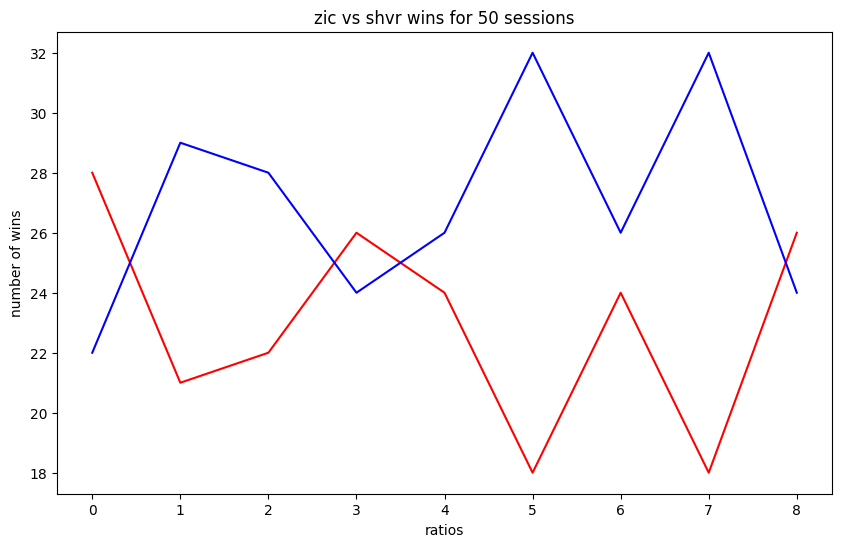

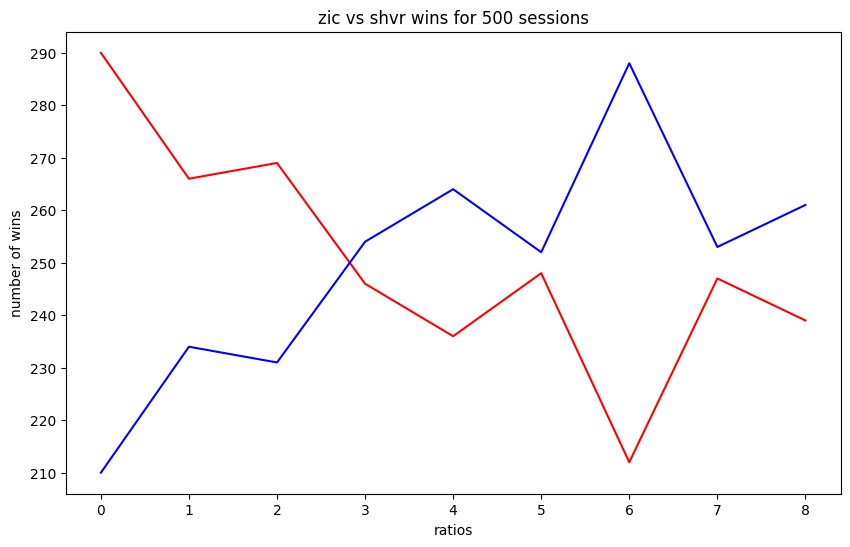

In [ ]:
plot_wins(res50)
plot_wins(res500)

To visualise the results of the market sessions, the number of "wins" a trader has over the other is plotted against all ratios from 1 to 9m with red being shvr and blue zic. The "number of wins" means the number of time the average profit of a the trader was higher than the other trader during the n sessions with a given ratio, ie at 0 for every 1 shvr trader there are 9 zic traders. when n=50, there is not enough to separate the two traders as they seem fairly similar. However as we increase the number of sessions the dominant trader type becomes better as there is simply more of them with ZIC out performing shvr consistantly. All left to do is to test the significance of this data collected to draw a conclusion. To account for this high variance, when using a t-test, "equal_var" variable is set to False.

In [42]:
p_vals_50 = collect_pvals_norm(res50)
p_vals_500 = collect_pvals_norm(res500)

p_res50 = A_B_test(p_vals_50, res50)
p_res500 = A_B_test(p_vals_500, res500)

n=50 ratio: 1 to 9 is NOT normal used NON-parametric test, p val is: 0.4159468137685064
n=50 ratio: 2 to 8 is NORMAL used parametric test, p val is: 0.22225607168905645
n=50 ratio: 3 to 7 is NORMAL used parametric test, p val is: 0.132959900769341
n=50 ratio: 4 to 6 is NORMAL used parametric test, p val is: 0.07407744311574833
n=50 ratio: 5 to 5 is NORMAL used parametric test, p val is: 0.23387190008298153
n=50 ratio: 6 to 4 is NORMAL used parametric test, p val is: 0.0010120719234421455
n=50 ratio: 7 to 3 is NORMAL used parametric test, p val is: 0.7927227020439028
n=50 ratio: 8 to 2 is NORMAL used parametric test, p val is: 0.017692094187770454
n=50 ratio: 9 to 1 is NORMAL used parametric test, p val is: 0.947675675393452
n=500 ratio: 1 to 9 is NOT normal used NON-parametric test, p val is: 1.6754346945434834e-06
n=500 ratio: 2 to 8 is NOT normal used NON-parametric test, p val is: 0.009074045782576841
n=500 ratio: 3 to 7 is NORMAL used parametric test, p val is: 0.06216431831269415


When n=50, there is simply not enough data to conclude any evidence from the p values generated as it can vary dramatically with each run. In the simulation above, no consistant logic or pattern can be extracted from the output as mostly it suggest no significance except for perhaps some instances. However as the number of sessions are increased, there is a clear picture of what ever trader type dominating the market does better than the other. the test resaults suggest, as there is a bigger gap in the ratios, the more statistical significance that one trader is better than the other. This was also observed when the wins diagrams was plotted.

PART C

Four trader types with different populations being tested to see whcich is the best. Having giveaway 'GVWY', shaver 'SHVR', zero intelligence constraint 'ZIC' and zero intelligence plus 'ZIP' traders at a predefined ratios below. Note that to gather all permutations, np.roll is used. the results are stored in an array where res[i][0] are the average means collected after then end of each session in the form of [['shver'], ['gvwy'], ['zic'], ['zip]] and res[i][1] is the p value after hypothesis testing. P values obtained are using either Annova test or kruskal test if data is parametric or non-parametric. helper functions are used with run_market_sim_four to do what has been described. Here rejecting the null hypothesis means there is a significant difference in the market but does not determine which trader is the best. Having a p value lower than 0.05 is expected in all sessions, and furthur analysis is needed to determine the best trader.

In [53]:
t = [25, 25, 25, 25]
t1 = [40, 20, 20, 20]
t2 = [10, 30, 30, 30]
t3 = [70, 10, 10, 10]

#res([shvr], [gvwy], [zic], [zip]), pval
four_25_50Sessions, pval_25_n50 = run_market_sim_four("equal", 50, t, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
four_25_500_sess, pval_25_n500 = run_market_sim_four("equal_500", 500, t, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)

#res[i][1] pval, vals ([shvr, gvwy, zic, zip]) = res[i][0]
res_4050, pvals4050 = [[] for _ in range(4)], []
res_40500, pvals40500 = [[] for _ in range(4)], []
res_10_50, pvals1050 = [[] for _ in range(4)], []
res_10_500, pvals10500= [[] for _ in range(4)], []
res_70_50, pvals7050 = [[] for _ in range(4)], []
res_70_500, pvals70500 = [[] for _ in range(4)], []
for i in range(len(t)):
    forty_50, p4050 = run_market_sim_four(trial_id="40_"+str(i)+"_perm", no_sessions=50, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_4050[i] = forty_50
    pvals4050.append(p4050)

    ten_50, p1050 = run_market_sim_four(trial_id="10_"+str(i)+"_perm", no_sessions=50, t=np.roll(t2, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_10_50[i] = ten_50
    pvals1050.append(p1050)

    seventy_50, p7050 = run_market_sim_four(trial_id="70_"+str(i)+"_perm", no_sessions=50, t=np.roll(t3, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_70_50[i] = seventy_50
    pvals7050.append(p7050)

    forty_500, p40500 = run_market_sim_four(trial_id="40_"+str(i)+"_perm_500", no_sessions=500, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_40500[i] = forty_500
    pvals40500.append(p40500)

    ten_500, p10500 = run_market_sim_four(trial_id="10_"+str(i)+"_perm_500", no_sessions=500, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_10_500[i] = ten_500
    pvals10500.append(p10500)

    seventy_500, p70500 = run_market_sim_four(trial_id="70_"+str(i)+"_perm_500", no_sessions=500, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_70_500[i] = seventy_500
    pvals70500.append(p70500)

KeyboardInterrupt: 

END OF REPORT. ONLY WORD COUNT BELOW THIS POINT. 

In [46]:
# Do not edit this code. It will print the word count of your notebook.
import io
from nbformat import current

def printWordCount(filepath):

    with io.open(filepath, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')

    word_count = 0
    for cell in nb.worksheets[0].cells:
        if cell.cell_type == "markdown":
            word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    print("Word count: " + str(word_count) + ". Limit is 2000 words.")

In [47]:
# This should be the final output of your notebook.
# Edit filename to be the same as this filename and then run.
# Save your file before running this code.

this_file_name = "CW-IEFT-template.ipynb" # Enter name of this file here
printWordCount(this_file_name)

Word count: 1007. Limit is 2000 words.


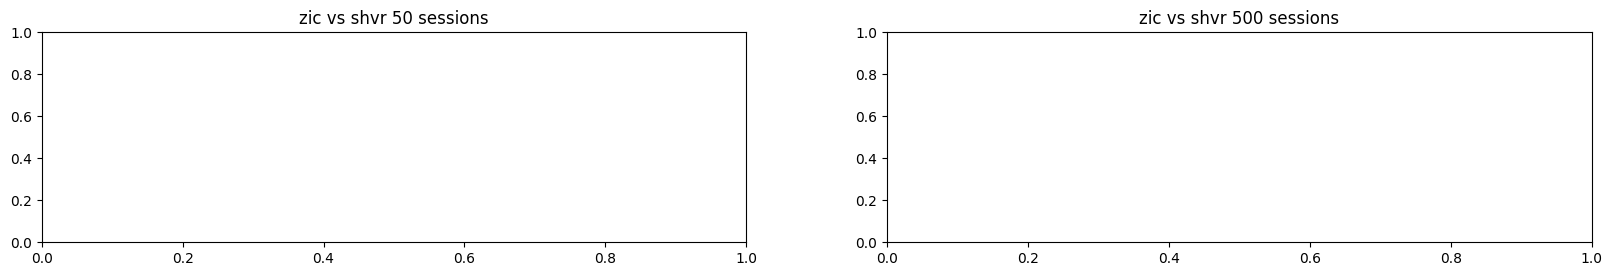

In [36]:

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(221)
ax1.plot(n50mean_zic, 'b', n50mean_shvr, 'r')
ax2 = fig.add_subplot(222)
ax2.plot(n500mean_zic, 'b', n500mean_shvr, 'r')

ax1.title.set_text('zic vs shvr 50 sessions')
ax2.title.set_text('zic vs shvr 500 sessions')



# fig, ax = plt.subplots(1, 2, figsize=(20, 4.5)) # row 1, col 2 index 1
# ax[0].plot(n50mean_zic, 'b', n50mean_shvr, 'r')
# plt.title('50 sessions')
# plt.xlabel('session')
# plt.ylabel('profit')
# ax[1].plot(n500mean_zic, 'b', n500mean_shvr, 'r')
# plt.title('500 sessions')
# plt.xlabel('session')
# plt.ylabel('profit')
# plt.show()